# $\mathbf{CODEUP}$ $\mathbf{CURRICULUM}$ $\mathbf{ACCESS}$ $\mathbf{ANALYSIS}$
## *Lesson access details by user and cohort (plus who is shady, and who is a maybe)* 
#### This notebook is in support of an email communication and slide prepared by Staff Data Science Team.
$\rightarrow$ Delivered on 6/13/2022 by: Ray Cerna, Jen Eyring, Lochlyn Laskowski, Julessa Morris, Ryan Miller

-----

# $\bullet$ Executive Summary

### Question:
### Actions: 
### Conclusions:  
### Recommendations/Next Steps:

----

# $\bullet$ Libraries Used

Common DS Libraries

In [1]:
# For data analysis:
import numpy as np
import pandas as pd

# Graphs/Visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For Statistics and Hypothesis Testing:
import scipy.stats as stats

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Internally Created Helper Functions

In [2]:
# For acquiring the dataset from the Cal Tech Database:
import acquire

# For acquiring, preparing/cleaning data while also creating dataframes with 
import wrangle

# Various functions for exploring the data
import explore

Others

In [3]:
#Ignore Warnings:
import warnings
warnings.filterwarnings('ignore')

# reloads import files each time a cell is ran (makes your life easier)
%load_ext autoreload
%autoreload 2

# Shows all columns of a dataframe
pd.set_option('display.max_columns', None)

# $\bullet$ Analysis

### Our task was to answer a serious of questions about those accessing the Codeup curriculum.
### To begin, loading the dataframes using our wrangle function, which acquires the data directly from the Codeup MySQL database.  
#### - Query and wrangle details can be found in the wrangle.py function.
#### - All dataframes have the same columns and datatypes.

In [4]:
df, df_staff, df_multicohort, df_unimputed, df_non_curriculum, df_outliers = wrangle.full_wrangle()

This returned the following dataframes (reassign if you missed any):


,Description,Record Count,Percent of Raw df
Dataframe,,,
df,Fully cleaned dataframe,509409,56.6%
df_staff,Cohort == Staff,84031,9.33%
df_multicohort,Users listed in more than one cohort,22708,2.52%
df_unimputed,Users with unknown/unimputable cohorts,45904,5.1%
df_non_curriculum,"Accessess not related to the curriculum, i.e. directories, images",116539,12.9%
df_outliers,Accesses meeting outlier conditions,121626,13.5%


##### The core 'df' dataframe is used for most of the user analysis, however other dataframes are integrated in when needed (namely for outlier/anomaly detection).

## Question 1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?

We analyzed each program seperately:

In [5]:
# Seperate analysis df into Web Dev and DS
wd = df[df.program_type == 'Web Development']
ds = df[df.program_type == 'Data Science']

### Examining Web Development

To determine the top lesson *across* cohorts, we found the top 3 lessons for each cohort, then tallied up how many times each of those lessons appears in one of the top 3:

In [6]:
# Call function that prints out a program's top 10 lessons overall, then the top three lessons
# accessed by each cohort (with counts)
wd_tl = explore.lesson_top_three(wd)
wd_tl

Top ten lessons:
----------
Not Lesson                                                                   97362
mysql.tables                                                                  5477
javascript-i.introduction.working-with-data-types-operators-and-variables     5312
mysql.databases                                                               5169
javascript-i.functions                                                        5163
javascript-i.javascript-with-html                                             5157
html-css.elements                                                             5046
mysql.users                                                                   4858
html-css.css-ii.bootstrap-grid-system                                         4843
java-iii.jsp-and-jstl                                                         4840
Name: lesson, dtype: int64


,Cohort,#1 lesson,#1 lesson count,#2 lesson,#2 lesson count,#3 lesson,#3 lesson count
0,Andromeda,javascript-i.introduction.working-with-data-types-operators-and-variables,263.0,mysql.tables,262.0,spring.fundamentals.repositories,259.0
1,Apex,java-i.syntax-types-and-variables,360.0,java-ii.object-oriented-programming,355.0,mysql.tables,348.0
2,Arches,javascript-i.loops,66.0,html-css.elements,65.0,javascript-ii.promises,63.0
3,Badlands,content.php_ii.command-line,6.0,content.php_i,5.0,content.php_ii.control-structures-i,5.0
4,Bash,javascript-i.introduction,260.0,javascript-i.javascript-with-html,213.0,javascript-i.introduction.working-with-data-types-operators-and-variables,211.0
5,Betelgeuse,html-css.elements,382.0,html-css.css-ii.bootstrap-grid-system,341.0,javascript-i.javascript-with-html,274.0
6,Ceres,javascript-i.introduction.working-with-data-types-operators-and-variables,372.0,html-css.forms,353.0,html-css.elements,351.0
7,Deimos,html-css.css-ii.bootstrap-introduction,340.0,html-css.css-ii.bootstrap-grid-system,324.0,mysql.tables,311.0
8,Europa,html-css.elements,340.0,html-css.css-i.selectors-and-properties,299.0,mysql.tables,285.0
9,Fortuna,mysql.tables,303.0,mysql.basic-statements,286.0,java-iii.jsp-and-jstl,275.0


In [7]:
# Finds the top functions across all cohorts
a1 = wd_tl['#1 lesson'].value_counts()
b1 = wd_tl['#2 lesson'].value_counts()
c1 = wd_tl['#3 lesson'].value_counts() 
(a1 + b1 + c1).nlargest()

mysql.tables                                                                 11.0
html-css.elements                                                             7.0
javascript-i.introduction.working-with-data-types-operators-and-variables     7.0
javascript-i.javascript-with-html                                             4.0
dtype: float64

> ### Key Takeaway: Lesson 'mysql/tables' was the most accessed overall, as well as the consistently the highest amongst the web development cohorts.
- ##### We also looked at the cohorts on a Unit (main topic) basis, and 'javascript-i' is the most accessed unit across cohorts.

### Examining Data Science

In [8]:
ds_tl = explore.lesson_top_three(ds)
ds_tl

Top ten lessons:
----------
classification.overview                     1310
1-fundamentals.1.1-intro-to-data-science    1270
classification.scale_features_or_not.svg    1138
sql.mysql-overview                          1008
fundamentals.intro-to-data-science           946
6-regression.1-overview                      848
10-anomaly-detection.1-overview              573
3-sql.1-mysql-overview                       543
anomaly-detection.overview                   523
stats.compare-means                          510
Name: lesson, dtype: int64


,Cohort,#1 lesson,#1 lesson count,#2 lesson,#2 lesson count,#3 lesson,#3 lesson count
0,Bayes,1-fundamentals.1.1-intro-to-data-science,573,6-regression.1-overview,411,10-anomaly-detection.1-overview,289
1,Curie,6-regression.1-overview,432,1-fundamentals.1.1-intro-to-data-science,344,3-sql.1-mysql-overview,333
2,Darden,classification.overview,858,classification.scale_features_or_not.svg,713,sql.mysql-overview,573
3,Easley,classification.scale_features_or_not.svg,283,classification.overview,265,fundamentals.intro-to-data-science,210


In [9]:
a3 = ds_tl['#1 lesson'].value_counts()
b3 = ds_tl['#2 lesson'].value_counts()
c3 = ds_tl['#3 lesson'].value_counts()
(a3 + b3 + c3).nlargest()

Series([], dtype: float64)

This did not work because it counts missing values as NaNs that wipe the whole row out.  Looking just at columns 1 and two:

In [10]:
(a3 + b3)

1-fundamentals.1.1-intro-to-data-science    2
6-regression.1-overview                     2
classification.overview                     2
classification.scale_features_or_not.svg    2
dtype: int64

> ### Key Takeaway: 'classification/overview is the is the highest accessed overall, and also scores high across cohorts with introduction/fundamentals close behind.  Interestingly, an image snuck in here and ranked very highly (classification/scale_features_or_no.svg) which means it must be a very good image!
> #### Interesting note: It seems the path syntax changed from Bayes to Easely, as evidenced by the fundamentals having two seperate high scoring lessons.
- ##### Additionally, when looking at top units, classification was accessed the most, in line with the most accessed lesson.

## Question 2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

## Question 3: Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

## Question 4: Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

## Question 5:  At some point in 2019, the ability for students and alumni to access both curriculum's (web development to data science, data science to web development) should have been shut off. Do you see any evidence of that happening? Did it happen before?

## Question 6: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [11]:
# Filters dataframes for program_types (web dev & data science) only after graduation date
grad_accessed_wd = wd[(wd.accessed > wd.end_date)]
grad_accessed_ds = ds[(ds.accessed > ds.end_date)]

In [12]:
# Returns the the top 5 lessons by web dev after graduation
grad_accessed_wd.lesson.value_counts()[1:6]

spring.fundamentals.controllers     959
spring.fundamentals.views           907
spring.setup                        892
spring.fundamentals.repositories    871
html-css.elements                   683
Name: lesson, dtype: int64

In [13]:
# Returns the top 5 lessons by data science after graduation
grad_accessed_ds.lesson.value_counts()[1:6]

sql.mysql-overview                          210
classification.scale_features_or_not.svg    174
fundamentals.intro-to-data-science          138
anomaly-detection.overview                  127
1-fundamentals.1.1-intro-to-data-science    117
Name: lesson, dtype: int64

Text(0.5, 1.0, 'Topics Referenced after Graduation Data Science')

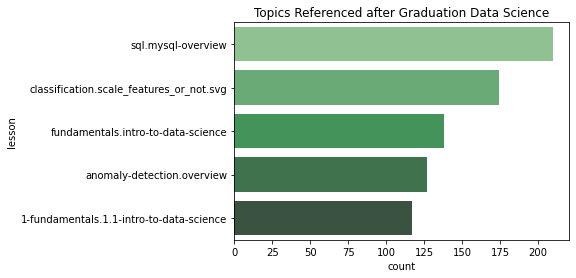

In [14]:
# plots the lessons on y-axis and counts on x-axis
sns.countplot(y="lesson", data=grad_accessed_ds, palette="Greens_d", 
              order=grad_accessed_ds.lesson.value_counts()[1:6].index)
plt.title("Topics Referenced after Graduation Data Science")

Text(0.5, 1.0, 'Topics Referenced after Graduation Web Development')

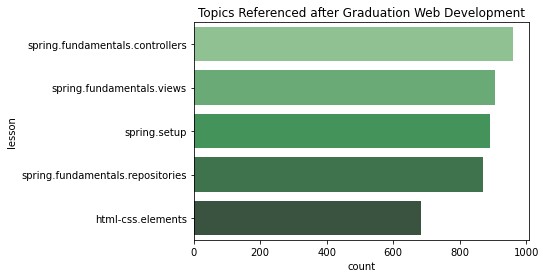

In [15]:
# plots the lessons on y-axis and counts on x-axis
sns.countplot(y="lesson", data=grad_accessed_wd, palette="Greens_d", 
              order=grad_accessed_wd.lesson.value_counts()[1:6].index)
plt.title("Topics Referenced after Graduation Web Development")

## Question 7: Which lessons are least accessed?

### Examining Web Development

Finding the least accessed lessons for Web Development cohorts is not starightforward.  There is a ton of noise, with lots of lessons having just a few accesses (many with just 1); in addition, cohorts have different sizes and a number are under-represented.  

Thus, we focused on finding the least accessed *Unit* for Web Development:

In [16]:
wd['unit'] = wd.path.str.split('/', expand=True)[0]
wd.unit.value_counts()[wd.unit.value_counts()>50].nsmallest(10)

introduction        52
git                 52
elements            54
1-fundamentals      62
prework            695
index.html        1080
web-design        1407
capstone          1847
slides            5993
content           6576
Name: unit, dtype: int64

> ### Key Takeaway: Not counting prework, it seems web-design is the least accessed unit in Web Development

### Examining Data Science

Data Science has tighter data, and therefore lends itself better for a more programmatic analysis.

Thus, we identified all lessons for every cohort and compared them against each other to determine which were 'common' to all cohorts - this should remove most of the noise.

In [17]:
# Create a list of DS cohorts
ds_cohorts = ds.groupby('cohort').lesson.nunique().index

# Now compare the lessons accessed in each cohort to see which have been accessed by all
setter = ds[ds.cohort == "Bayes"].lesson.unique()
for i in ds_cohorts:
    unit_list = ds[ds.cohort == i].lesson.unique()
    setter = list(set(setter).intersection(unit_list)) 

# Create a dataframe to display the least accessed 'common' lessons
qw = []
for n in setter:
    row = {}
    row['Lesson'] = n
    row['Count'] = df[df.lesson == n].accessed.count()
    qw.append(row)
pd.DataFrame(qw).set_index('Lesson').Count.nsmallest(10)

Lesson
capstones.capstones                                46
storytelling.creating-charts                       56
fundamentals.cli.more-topics                       60
fundamentals.cli.moving-files                      70
storytelling.connecting-to-data                    78
nlp.overview                                       79
fundamentals.cli.navigating-the-filesystem         82
fundamentals.cli.file-paths                        83
fundamentals.cli.creating-files-and-directories    93
storytelling.tableau                               96
Name: Count, dtype: int64

> ### Key Takeaway: Capstones/capstones was the least accessed lesson, followed by storytelling/creating-charts

### Question 8: Anything else I should be aware of?